In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df=pd.read_csv("fashion_data_set.csv")
df.loc[df['total_sold']<df['total_rating'],'total_sold']=df.loc[df['total_sold']<df['total_rating'],'total_rating']
df.columns

Index(['price_ori', 'item_rating', 'price_actual', 'total_rating',
       'total_sold', 'favorite', 'Type of product', 'Type of product_2',
       'date_date', 'from', 'to', 'fees'],
      dtype='object')

In [5]:
date_vs_volume_set=df[['price_ori', 'item_rating', 'price_actual', 'total_rating','total_sold', 'favorite','date_date']].groupby('date_date').agg("sum")

In [6]:
date_vs_volume_set

,price_ori,item_rating,price_actual,total_rating,total_sold,favorite
date_date,,,,,,
2020-11-23,401923.63,22629.9,251085.69,1430519.0,3834037.0,3144406.0
2020-11-24,263213.19,22023.3,167855.98,815797.0,2267134.0,1589833.0
2020-11-25,1195.28,148.7,790.46,15704.0,51645.0,52368.0
2020-11-26,599.14,73.6,458.46,42999.0,101100.0,93283.0
2020-12-01,216995.51,23286.6,166873.89,441675.0,1181550.0,971623.0
2020-12-02,8669.24,1359.5,6051.91,58500.0,170303.0,110253.0


In [7]:
plt.figure()

fig=px.line(date_vs_volume_set,x=date_vs_volume_set.index,y='total_sold',
        labels={'total_sold': 'Total Sold', 'index': 'Date'})
fig.show()

<Figure size 640x480 with 0 Axes>

In [8]:
date_vs_volume_set_2=df[['price_ori', 'item_rating', 'price_actual', 'total_rating','total_sold', 'favorite','date_date','Type of product']].groupby(['Type of product','date_date']).agg("sum")

In [9]:
plt.figure()

fig=px.line(date_vs_volume_set_2.reset_index(),
            x='date_date',
            y='total_sold',
            color='Type of product',  # this adds a legend
            labels={'total_sold': 'Total Sold', 'date_date': 'Date'}
            )
fig.show()

<Figure size 640x480 with 0 Axes>

<Axes: >

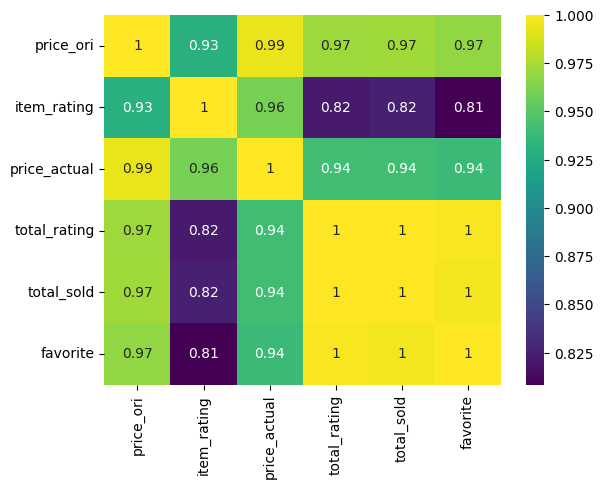

In [10]:
date_vs_volume_set.corr()
plt.figure()
sns.heatmap(date_vs_volume_set.corr(),cmap='viridis',annot=True)


<Axes: >

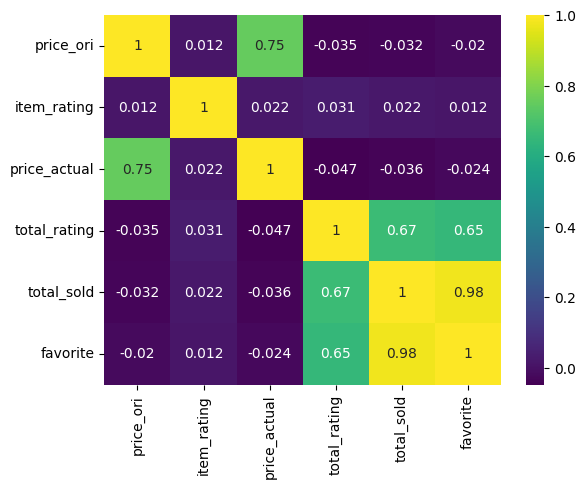

In [11]:
dsc=df[['price_ori', 'item_rating', 'price_actual', 'total_rating','total_sold', 'favorite']].corr()
plt.figure()
sns.heatmap(dsc,cmap='viridis',annot=True)


In [12]:
product_meaned=df[['price_ori', 'item_rating', 'price_actual', 'total_rating','total_sold', 'favorite','Type of product']].groupby(['Type of product']).agg("mean")

<Axes: xlabel='Type of product', ylabel='price_actual'>

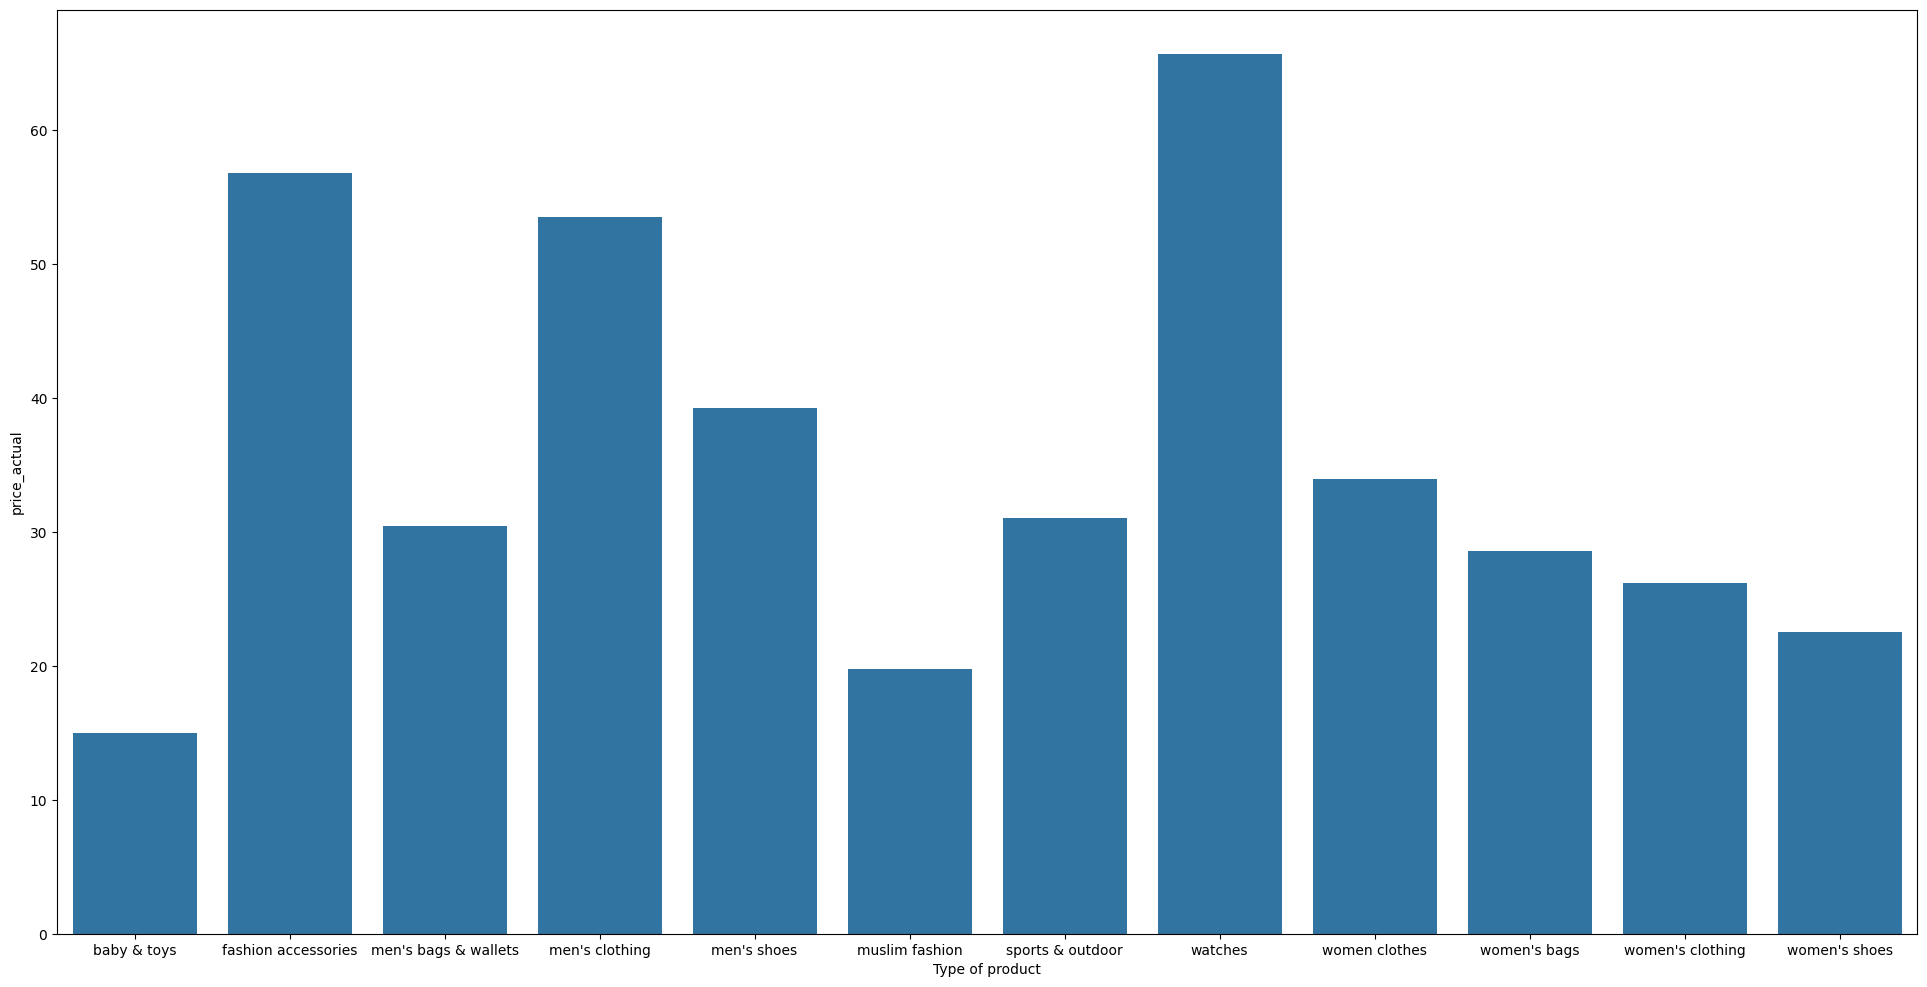

In [13]:
plt.figure(figsize=(24,12))
sns.barplot(product_meaned,x=product_meaned.index,y='price_actual')


In [14]:
def grouping(x):
    total_volume = x['total_sold'].sum()
    average_price_ori =(x['price_ori']*x['total_sold']).sum()/total_volume
    average_price_actual = (x['price_actual']*x['total_sold']).sum()/total_volume
    average_item_rating = (x['item_rating']*x['total_rating']).sum()/(x['total_rating'].sum())
    favorite = x['favorite'].sum()
    total_rating = x['total_rating'].sum()
    return pd.Series(
        {
            'price_ori': average_price_ori, 'item_rating' :average_item_rating,
            'price_actual' : average_price_actual, 'total_rating' : total_rating,
            'total_sold' : total_volume, 'favorite': favorite
        }
    )
    
    
    



data_managed=df[['price_ori', 'item_rating', 'price_actual', 'total_rating','total_sold', 'favorite','Type of product']].groupby(['Type of product']).apply(grouping)

C:\Users\wak computer\AppData\Local\Temp\ipykernel_17352\2929528399.py:21: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [15]:
data_managed

,price_ori,item_rating,price_actual,total_rating,total_sold,favorite
Type of product,,,,,,
baby & toys,15.484390,4.923128,13.289781,482426.0,1319339.0,868326.0
fashion accessories,13.256913,4.906655,9.476168,148249.0,635478.0,346580.0
men's bags & wallets,46.826095,4.871543,23.393414,458398.0,907924.0,700995.0
men's clothing,33.719546,4.847194,21.955988,114094.0,274170.0,227795.0
men's shoes,47.024922,4.824256,36.020991,27944.0,52882.0,51999.0
muslim fashion,25.187331,4.877077,14.381962,313049.0,881086.0,759065.0
sports & outdoor,40.252446,4.872523,28.749027,2220.0,3802.0,2668.0
watches,78.029540,4.809045,34.054175,290603.0,719057.0,536250.0
women clothes,39.048391,4.871429,30.793174,98.0,230.0,320.0


<Axes: xlabel='Type of product', ylabel='price_actual'>

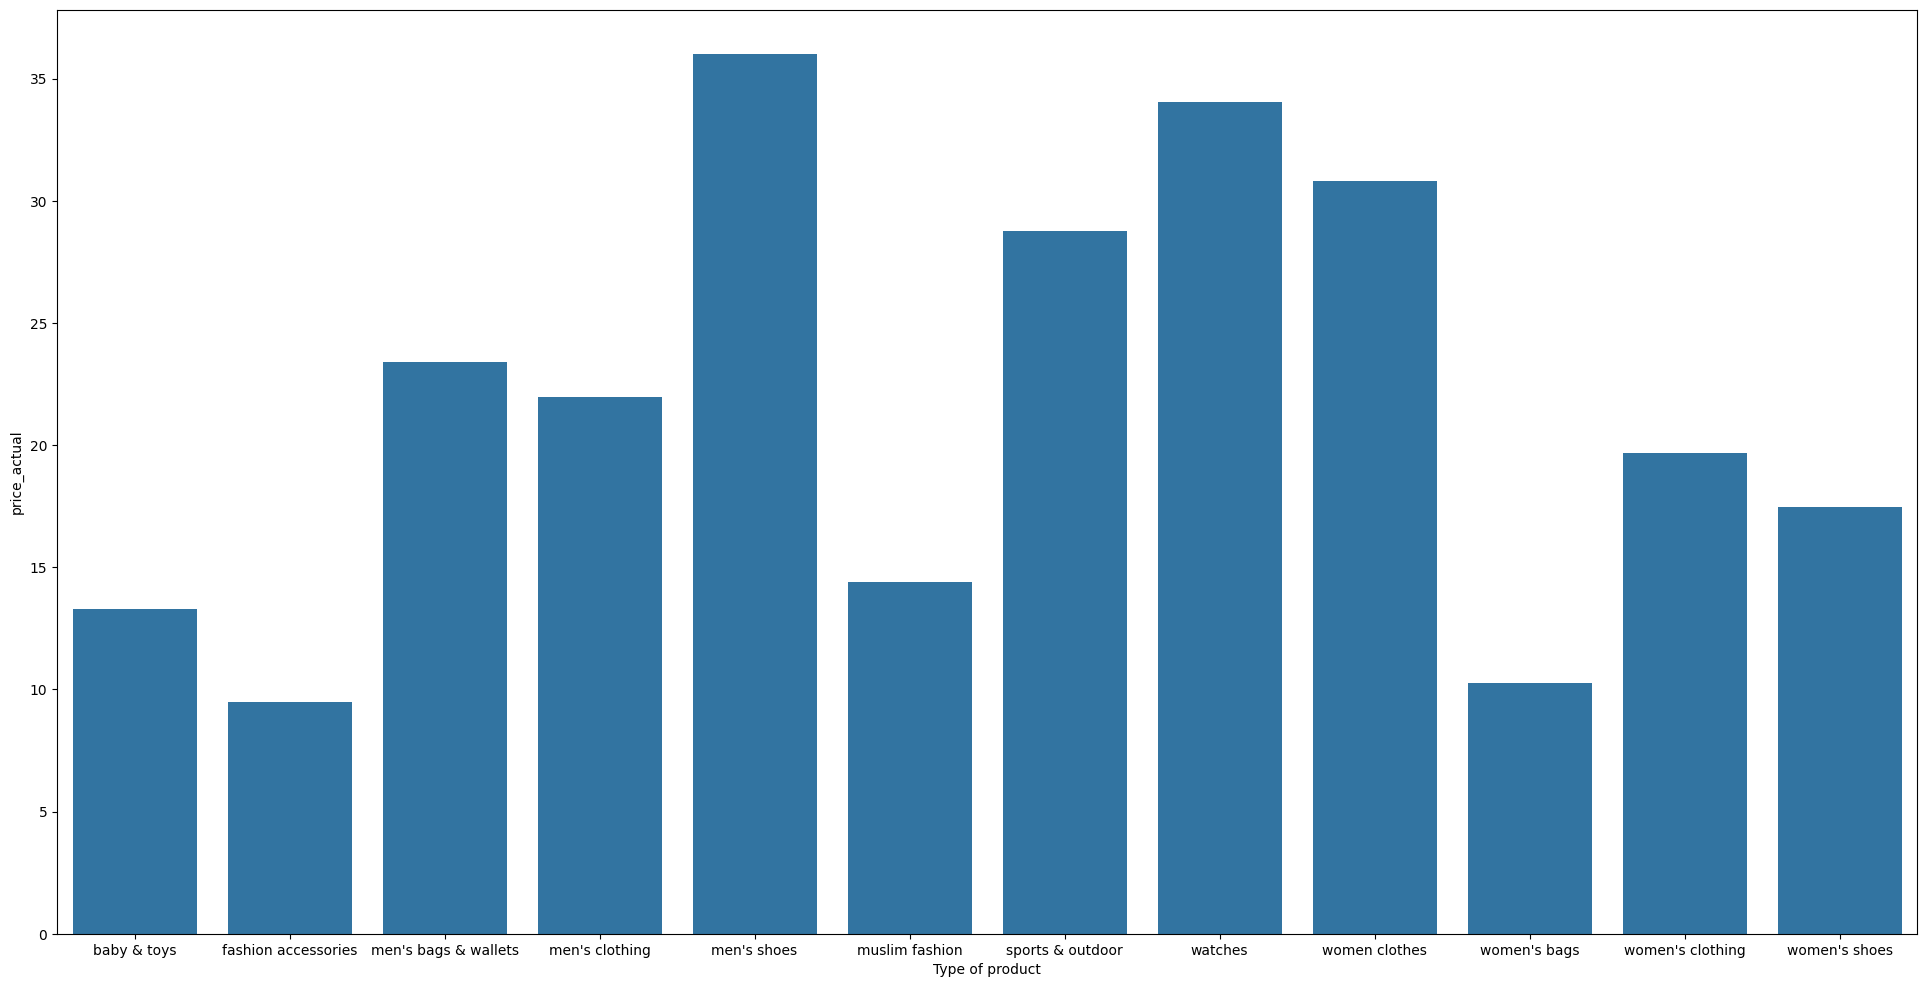

In [16]:
plt.figure(figsize=(24,12))
sns.barplot(data_managed,x=product_meaned.index,y='price_actual')

In [17]:
df['discount']=(1-(df['price_actual']/df['price_ori']))

In [18]:
df[df['discount']==0]

,price_ori,item_rating,price_actual,total_rating,total_sold,favorite,Type of product,Type of product_2,date_date,from,to,fees,discount
1,40.90,4.8,40.90,123.0,242.0,744.0,women's clothing,dresses,2020-11-23,overseas,kuala lumpur,0.00,0.0
3,44.00,5.0,44.00,6.0,7.0,27.0,women's clothing,dresses,2020-11-23,local,kuala lumpur,0.00,0.0
4,19.00,4.9,19.00,42.0,84.0,27.0,men's clothing,innerwear,2020-11-23,local,kuala lumpur,0.00,0.0
8,44.97,4.8,44.97,6.0,8.0,141.0,women's clothing,dresses,2020-11-23,overseas,kuala lumpur,0.00,0.0
10,31.50,4.7,31.50,285.0,577.0,577.0,women's clothing,dresses,2020-11-23,overseas,kuala lumpur,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14360,8.00,5.0,8.00,524.0,1100.0,7.0,women's clothing,tops,2020-12-02,local,kuala lumpur,0.00,0.0
14363,79.00,5.0,79.00,1.0,1.0,26.0,women's clothing,traditional wear,2020-12-02,local,kuala lumpur,12.50,0.0
14365,4.50,4.9,4.50,36.0,101.0,74.0,women's clothing,tops,2020-12-02,local,kuala lumpur,0.00,0.0
14367,6.00,5.0,6.00,491.0,723.0,7.0,women's clothing,tops,2020-12-02,local,kuala lumpur,0.00,0.0


<Axes: >

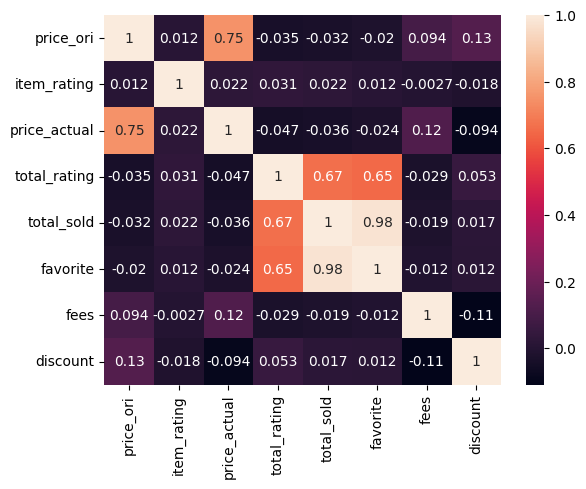

In [19]:
sns.heatmap(df[['price_ori', 'item_rating', 'price_actual', 'total_rating',
       'total_sold', 'favorite', 'fees', 'discount']].corr(),annot=True)

<Figure size 10000x10000 with 0 Axes>

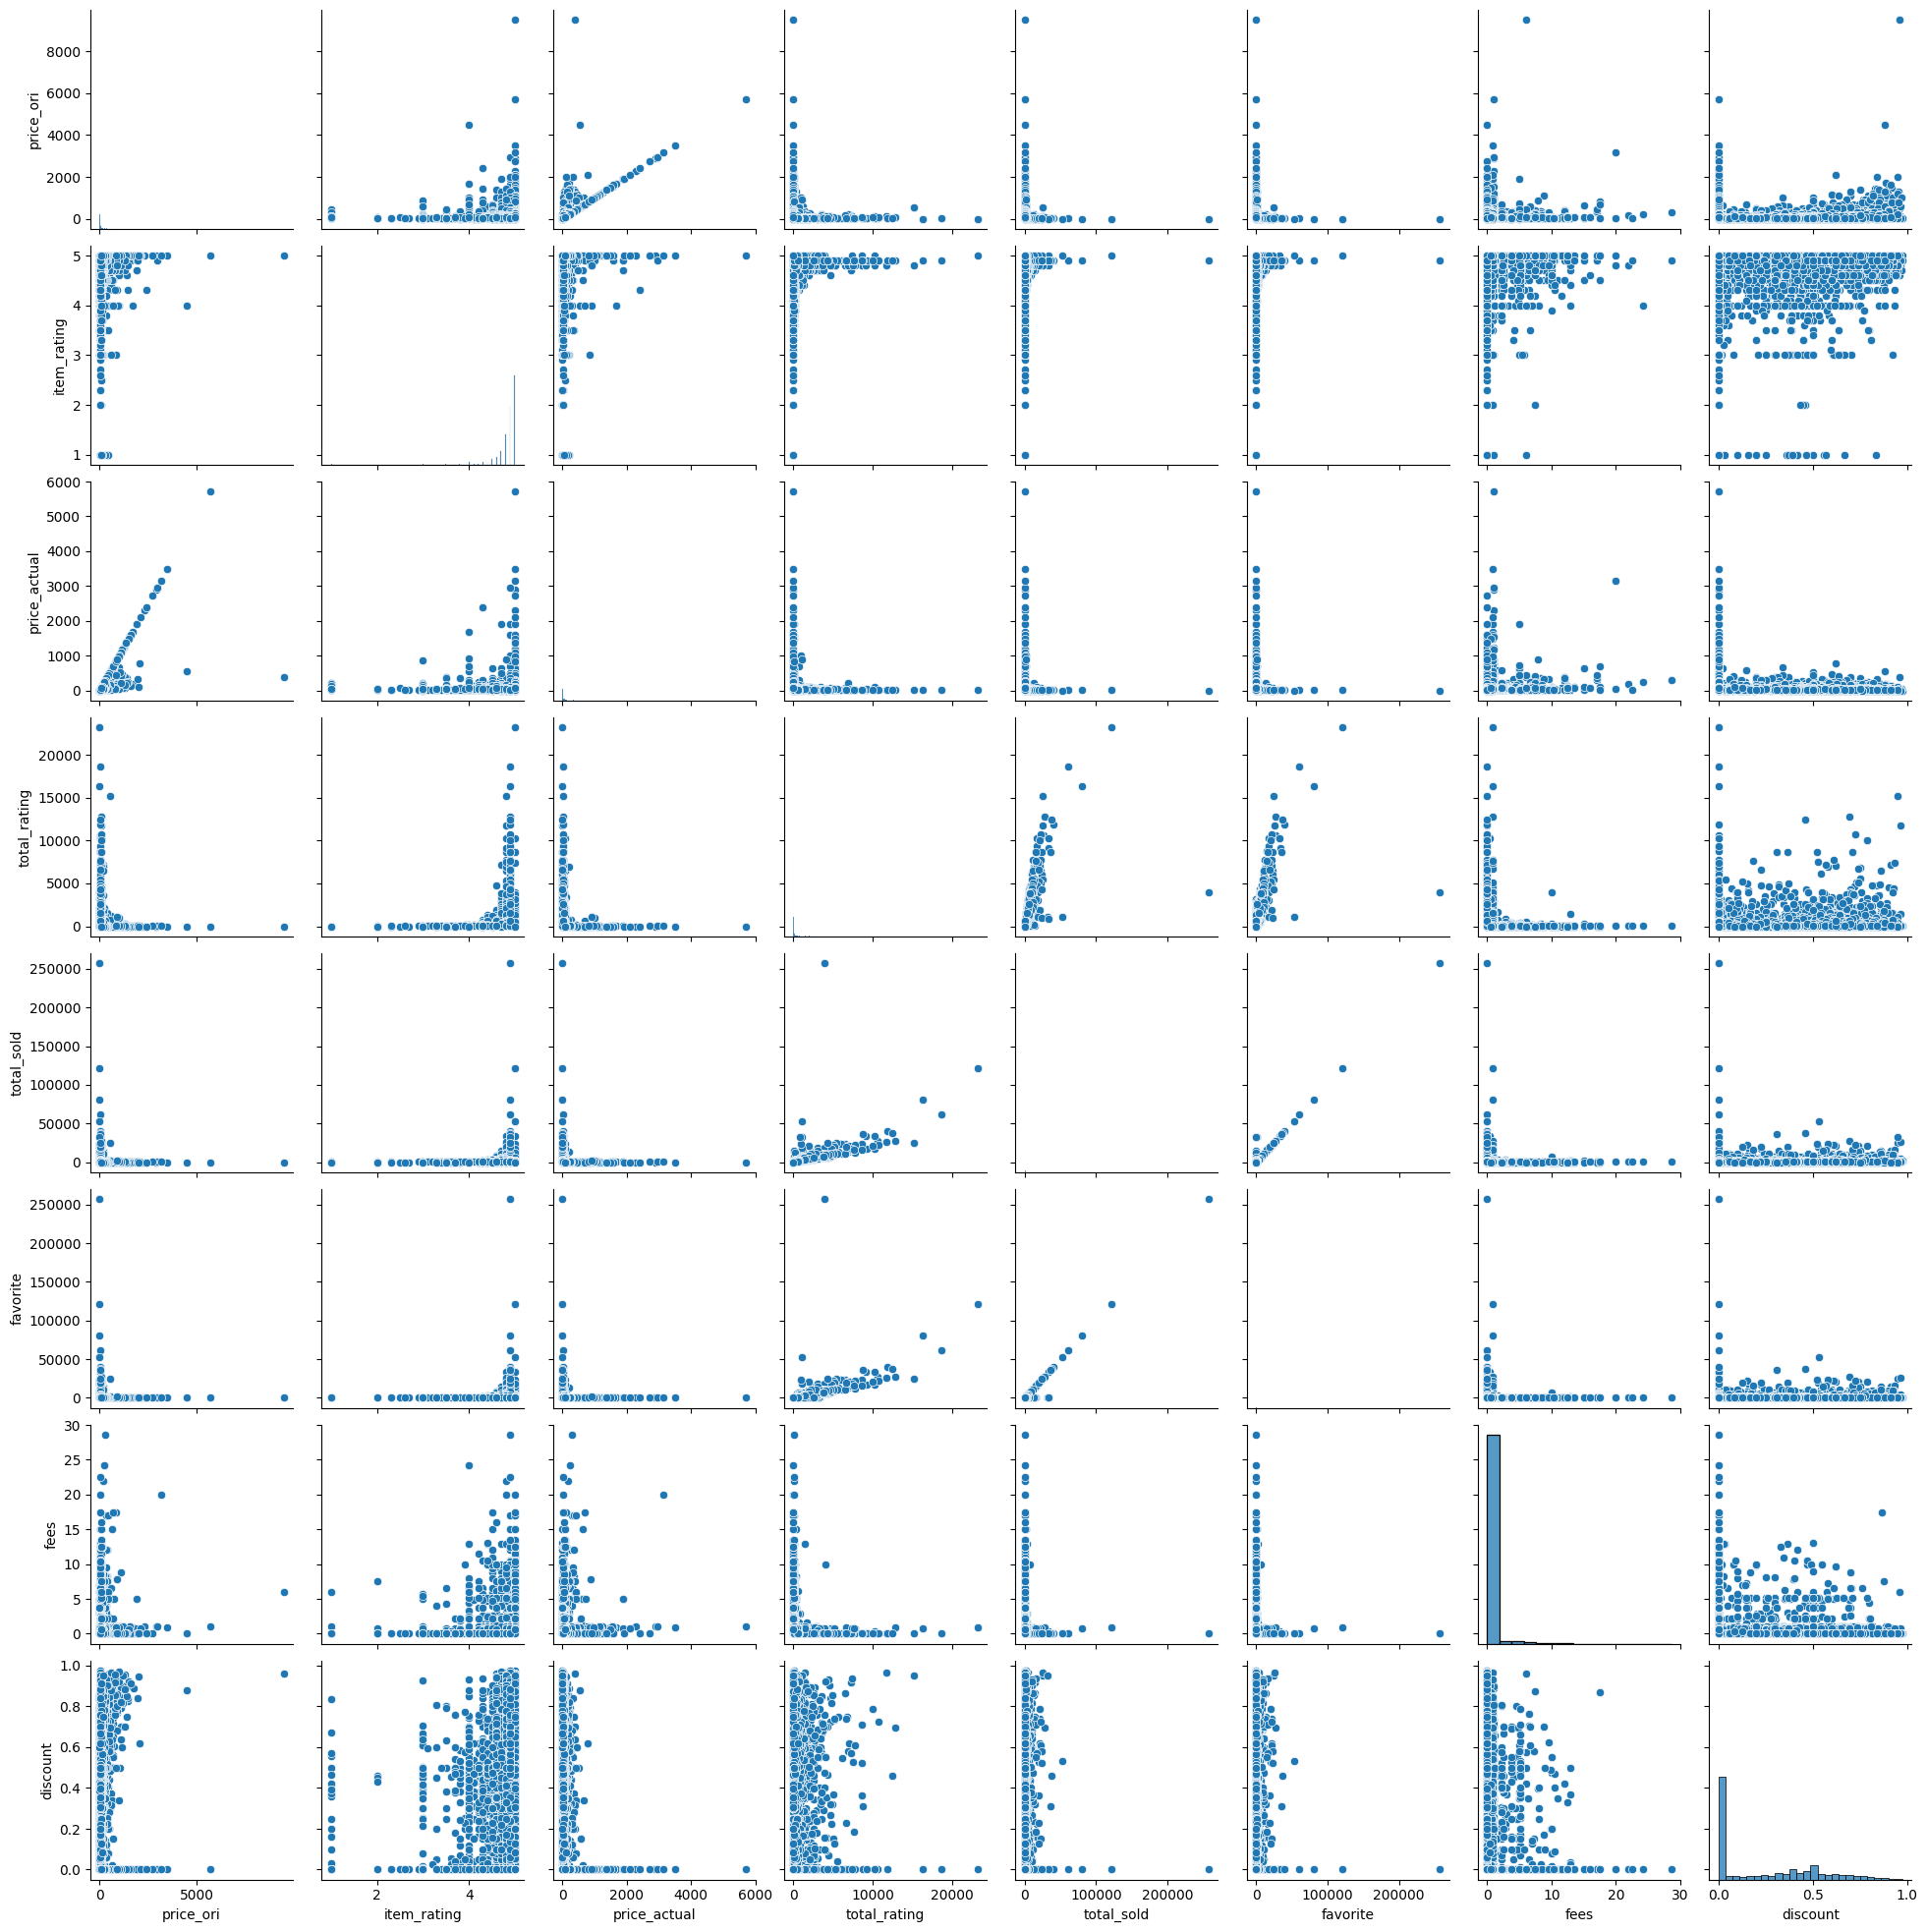

In [20]:
plt.figure(figsize=(100,100))
sns.pairplot(df)

In [21]:
import plotly.express as px
df_2=df.groupby('item_rating').agg('sum').reset_index()
px.histogram(df, x='item_rating',y='total_sold', color='Type of product', barmode='overlay')